In [2]:
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
# from adjustText import adjust_text
import osmnx as ox

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
business = pd.read_pickle('../data/business.pkl')

In [ ]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
business['state'].value_counts()

NameError: name 'business' is not defined

In [4]:
city_cnt_business = business.groupby('city').agg(
    state=('state', 'first'),
    cnt=('business_id', 'count'),
    latitude=('latitude', 'mean'),
    longitude=('longitude', 'mean'),
    stars=('stars', 'mean'),
    review_count=('review_count', 'mean')
).reset_index()

city_cnt_business = city_cnt_business[city_cnt_business['cnt'] >= 50]
city_cnt_business.shape

(281, 7)

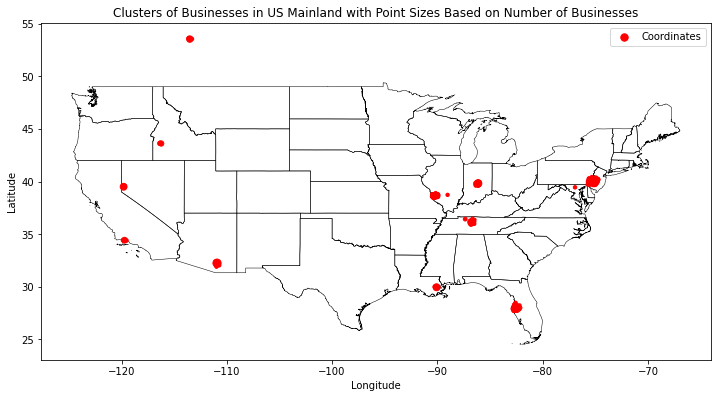

In [5]:
# Normalize the 'cnt' column to a range for marker sizes (e.g., 10 to 100)
marker_size = (city_cnt_business['cnt'] - city_cnt_business['cnt'].min()) / (city_cnt_business['cnt'].max() - city_cnt_business['cnt'].min()) * 90 + 10
city_cnt_business['marker_size'] = marker_size

# Read in the US states shapefile data
states = gpd.read_file("../data/map/cb_2020_us_state_500k.shp")

# Remove non-continental states (Alaska, Hawaii, and overseas territories)
continental_us_states = states.query("NAME not in ['Alaska', 'Hawaii', 'Puerto Rico', 'American Samoa', 'Guam', 'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands']")

# Convert the DataFrame to a GeoDataFrame
gcity_cnt_business_points = gpd.GeoDataFrame(city_cnt_business, geometry=gpd.points_from_xy(city_cnt_business.longitude, city_cnt_business.latitude))

# Plot the US map and points
fig, ax = plt.subplots(figsize=(12, 8))
continental_us_states.plot(ax=ax, linewidth=0.5, edgecolor='black', column='NAME', legend=False, facecolor='none')
gcity_cnt_business_points.plot(ax=ax, color='red', markersize=city_cnt_business['marker_size'], label='Coordinates')

# for idx, row in gcity_cnt_business_points.iterrows():
#     plt.annotate(row['city'], (row['geometry'].x + 0.5, row['geometry'].y + 0.5), fontsize=8)

# texts = []
# for idx, row in gcity_cnt_business_points.iterrows():
#     x, y = row['geometry'].x, row['geometry'].y
#     texts.append(ax.annotate(row['city'], (x, y), fontsize=8))

# # Automatically adjust text labels to minimize overlaps
# adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1),
#             arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Businesses in US Mainland with Point Sizes Based on Number of Businesses')
plt.savefig('../result/US_all.png', dpi=300)
plt.legend()
plt.show()

In [6]:
city_cnt_business.sort_values(by='cnt', ascending=False, inplace=True)

In [7]:
city_cnt_business[50:100]

,city,state,cnt,latitude,longitude,stars,review_count,marker_size,geometry
1279,Wayne,PA,375,40.051271,-75.398993,3.644000,39.117333,12.014602,POINT (-75.39899 40.05127)
665,Media,PA,372,39.916765,-75.400716,3.676075,37.696237,11.996005,POINT (-75.40072 39.91677)
1044,Smyrna,TN,366,35.984745,-86.505004,3.289617,25.868852,11.958813,POINT (-86.50500 35.98474)
875,Phoenixville,PA,365,40.131979,-75.520564,3.647945,32.945205,11.952614,POINT (-75.52056 40.13198)
1028,Seminole,FL,359,27.846061,-82.788785,3.668524,26.922006,11.915421,POINT (-82.78878 27.84606)
768,Newark,DE,359,39.686526,-75.672209,3.116992,36.479109,11.915421,POINT (-75.67221 39.68653)
1089,St Louis,MO,357,38.614837,-90.303959,3.619048,67.756303,11.903024,POINT (-90.30396 38.61484)
438,Gretna,LA,352,29.904474,-90.042200,3.526989,26.409091,11.872030,POINT (-90.04220 29.90447)
709,Mount Laurel,NJ,344,39.951831,-74.915790,3.354651,36.892442,11.822440,POINT (-74.91579 39.95183)
573,Langhorne,PA,327,40.179137,-74.897473,3.232416,32.382263,11.717060,POINT (-74.89747 40.17914)


In [8]:
cap_business = business[business['city'] == 'Carpinteria']
cap_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [9]:
# Specify the name of the city
city = "Carpinteria, California, USA"

# Download the street network data for the city
graph = ox.graph_from_place(city, network_type='all')

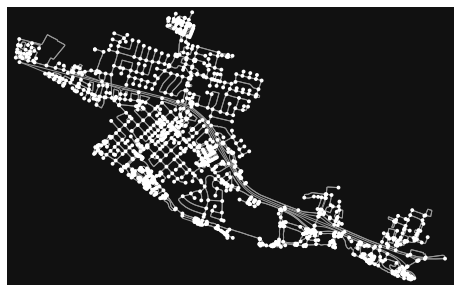

In [10]:
# Plot the street network
fig, ax = ox.plot_graph(ox.project_graph(graph), show=False, close=False)

# Plot the points on the map
for index, row in cap_business.iterrows():
    ax.scatter(row['longitude'], row['latitude'], c='red', s=50)

# Display the plot
plt.savefig('../result/Carpinteria_network.png', dpi=300)
plt.show()

In [11]:
cap_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [12]:
cap_business['review_count'].describe()

count    298.000000
mean      56.694631
std      105.801689
min        5.000000
25%        8.000000
50%       16.000000
75%       52.000000
max      885.000000
Name: review_count, dtype: float64

In [13]:

# Specify the name of the city
city = "Carpinteria, California, USA"

# Choose the center of the map and the initial zoom level
map_center = [cap_business['latitude'].mean(), cap_business['longitude'].mean()]
map_zoom = 14

# Create a folium map object
m = folium.Map(location=map_center, zoom_start=map_zoom, tiles='Stamen Toner')

# Define a function to assign a color based on the rating value
def get_marker_color(stars):
    if stars >= 4.5:
        return 'green'
    elif stars >= 3.5:
        return 'orange'
    else:
        return 'red'

# Define a function to assign a marker size based on the review_count value
def get_marker_size(review_count):
    if review_count >= 500:
        return 'large'
    elif review_count >= 100:
        return 'medium'
    else:
        return 'small'

# Plot the points on the map
for index, row in cap_business.iterrows():
    color = get_marker_color(row['stars'])
    size = get_marker_size(row['review_count'])
    folium.Marker([row['latitude'], row['longitude']], popup=row['name'], icon=folium.Icon(color=color, icon_size = size)).add_to(m)

# Display the map
m.save('../result/Carpinteria.html')
m

## Load Review Data

In [14]:
review = pd.read_pickle('../data/review.pkl')

In [15]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [17]:
cap_reveiw = review[review['business_id'].isin(cap_business['business_id'])]
cap_reveiw.shape

(17381, 9)

In [19]:
word = 'expensive'
cap_reveiw['expensive'] = cap_reveiw['text'].str.contains(word)

C:\Users\hengh\AppData\Local\Temp\ipykernel_4236\3379787129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_reveiw['expensive'] = cap_reveiw['text'].str.contains(word)


In [25]:
cap_reveiw_business = cap_reveiw.groupby('business_id').agg(
    useful = ('useful', 'sum'),
    funny = ('funny', 'sum'),
    cool = ('cool', 'sum'),
    expensive = ('expensive', 'sum')
).reset_index()
cap_reveiw_business.shape

(298, 5)

In [26]:
cap_reveiw_business = cap_reveiw_business.merge(cap_business[['business_id', 'latitude', 'longitude']], how = 'inner')
cap_reveiw_business.shape

(298, 7)

In [27]:
cap_reveiw_business['expensive'].describe()

count    298.000000
mean       1.147651
std        2.349513
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       15.000000
Name: expensive, dtype: float64

In [30]:
# Specify the name of the city
city = "Carpinteria, California, USA"

# Choose the center of the map and the initial zoom level
map_center = [cap_reveiw_business['latitude'].mean(), cap_reveiw_business['longitude'].mean()]
map_zoom = 14

# Create a folium map object
m = folium.Map(location=map_center, zoom_start=map_zoom, tiles='Stamen Toner')

# Define a function to assign a color based on the rating value
def get_marker_color(expensive):
    if expensive < 1:
        return 'green'
    elif expensive <= 5:
        return 'orange'
    else:
        return 'red'


# Plot the points on the map
for index, row in cap_reveiw_business.iterrows():
    color = get_marker_color(row['expensive'])
    folium.Marker([row['latitude'], row['longitude']], popup=row['expensive'], icon=folium.Icon(color=color)).add_to(m)

# Display the map
m.save('../result/Carpinteria_expensive.html')
m